### **Covering basic functionality by Gemini**

In [3]:
!pip install -q -U google-generativeai

**Importing packages**

In [4]:
import google.generativeai as genai
import pathlib
# Below are for text output refining
import textwrap
from IPython.display import display
from IPython.display import Markdown

In [5]:
# Creating a function to clean the text give by the GEMINI
# becaus eit will contain the meta characters in it

def to_markdown(text):
  text = text.replace('+','*')
  return Markdown(textwrap.indent(text,'> ',predicate=lambda _:True))

# Check is it working
in_text = "This is the + sample text"
result = to_markdown(in_text)
display(result)

> This is the * sample text

**Setting up the Gemini API key, before using Gemini**

Once you have API key with you pass it to the SDK. And we can do it in 2 ways:
- Put the key in GOOGLE_API_KEY envi. variable, the SDK will automatically fetch it.

- Pass the key to genai.configure(api_key=...)

In [6]:
from google.colab import userdata

# getting key
GOOGLE_API_KEY = userdata.get('geminit_api_key')

# confuguring the key
genai.configure(api_key=GOOGLE_API_KEY)

In [7]:
#listing the models

for models in genai.list_models():
   print(models)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko

In [8]:
# But we only need the model which can generate the content
for models in genai.list_models():
  if 'generateContent' in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental
models/gemma-3-27b-i

**Generating text from text**

In [9]:
model = genai.GenerativeModel('gemini-2.0-flash')

In [10]:
%%time
response = model.generate_content('What is life ?')
response.text


CPU times: user 66.9 ms, sys: 6.95 ms, total: 73.8 ms
Wall time: 6.79 s


'Defining "life" is a surprisingly complex and philosophical question that has puzzled scientists, philosophers, and thinkers for centuries. There\'s no single, universally accepted definition. However, we can approach it from different angles:\n\n**1. Biological Perspective:**\n\n*   **Organization:** Living things are highly organized and complex, composed of cells.\n*   **Metabolism:** They take in energy and materials from their environment and transform them to sustain themselves. This includes processes like respiration, digestion, and excretion.\n*   **Growth:** They increase in size or complexity over time.\n*   **Adaptation:** They possess the ability to change over time in response to their environment (evolution).\n*   **Response to Stimuli:** They react to changes in their surroundings (e.g., moving towards light, withdrawing from pain).\n*   **Reproduction:** They have the capacity to produce offspring, either sexually or asexually.\n*   **Homeostasis:** They maintain a st

In [11]:
# Parts to get the text content of the response
response.parts

[text: "Defining \"life\" is a surprisingly complex and philosophical question that has puzzled scientists, philosophers, and thinkers for centuries. There\'s no single, universally accepted definition. However, we can approach it from different angles:\n\n**1. Biological Perspective:**\n\n*   **Organization:** Living things are highly organized and complex, composed of cells.\n*   **Metabolism:** They take in energy and materials from their environment and transform them to sustain themselves. This includes processes like respiration, digestion, and excretion.\n*   **Growth:** They increase in size or complexity over time.\n*   **Adaptation:** They possess the ability to change over time in response to their environment (evolution).\n*   **Response to Stimuli:** They react to changes in their surroundings (e.g., moving towards light, withdrawing from pain).\n*   **Reproduction:** They have the capacity to produce offspring, either sexually or asexually.\n*   **Homeostasis:** They main

In [12]:
# to get the promt feedback actually to see how my prompt is
print(response.prompt_feedback)

In [13]:
# lets try stream= True i.e. the model will generate the response on the fly and one by one give it to us
response = model.generate_content('What is life ?',
                                  stream=True)
for chunks in response:
  print(chunks.text)
  print('-'*80)

Defining
--------------------------------------------------------------------------------
 "life" is a surprisingly complex question! There's no single, universally agreed
--------------------------------------------------------------------------------
-upon definition, but here's a breakdown of the key characteristics that biologists
--------------------------------------------------------------------------------
 generally use to identify living things:

**Core Characteristics of Life:**

*   **Organization:** Living things exhibit a complex organization, from atoms and molecules to cells,
--------------------------------------------------------------------------------
 tissues, organs, and organ systems. This organization goes beyond simple random collections of matter.

*   **Metabolism:** Life involves chemical processes that acquire and
--------------------------------------------------------------------------------
 use energy. This includes:
    *   **Anabolism:** Building comp

### **Trying text generation from image**

In [14]:
!curl -o image.jpg https://www.gigadocs.com/blog/wp-content/uploads/2020/03/istock-955998758.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  590k  100  590k    0     0   368k      0  0:00:01  0:00:01 --:--:--  368k


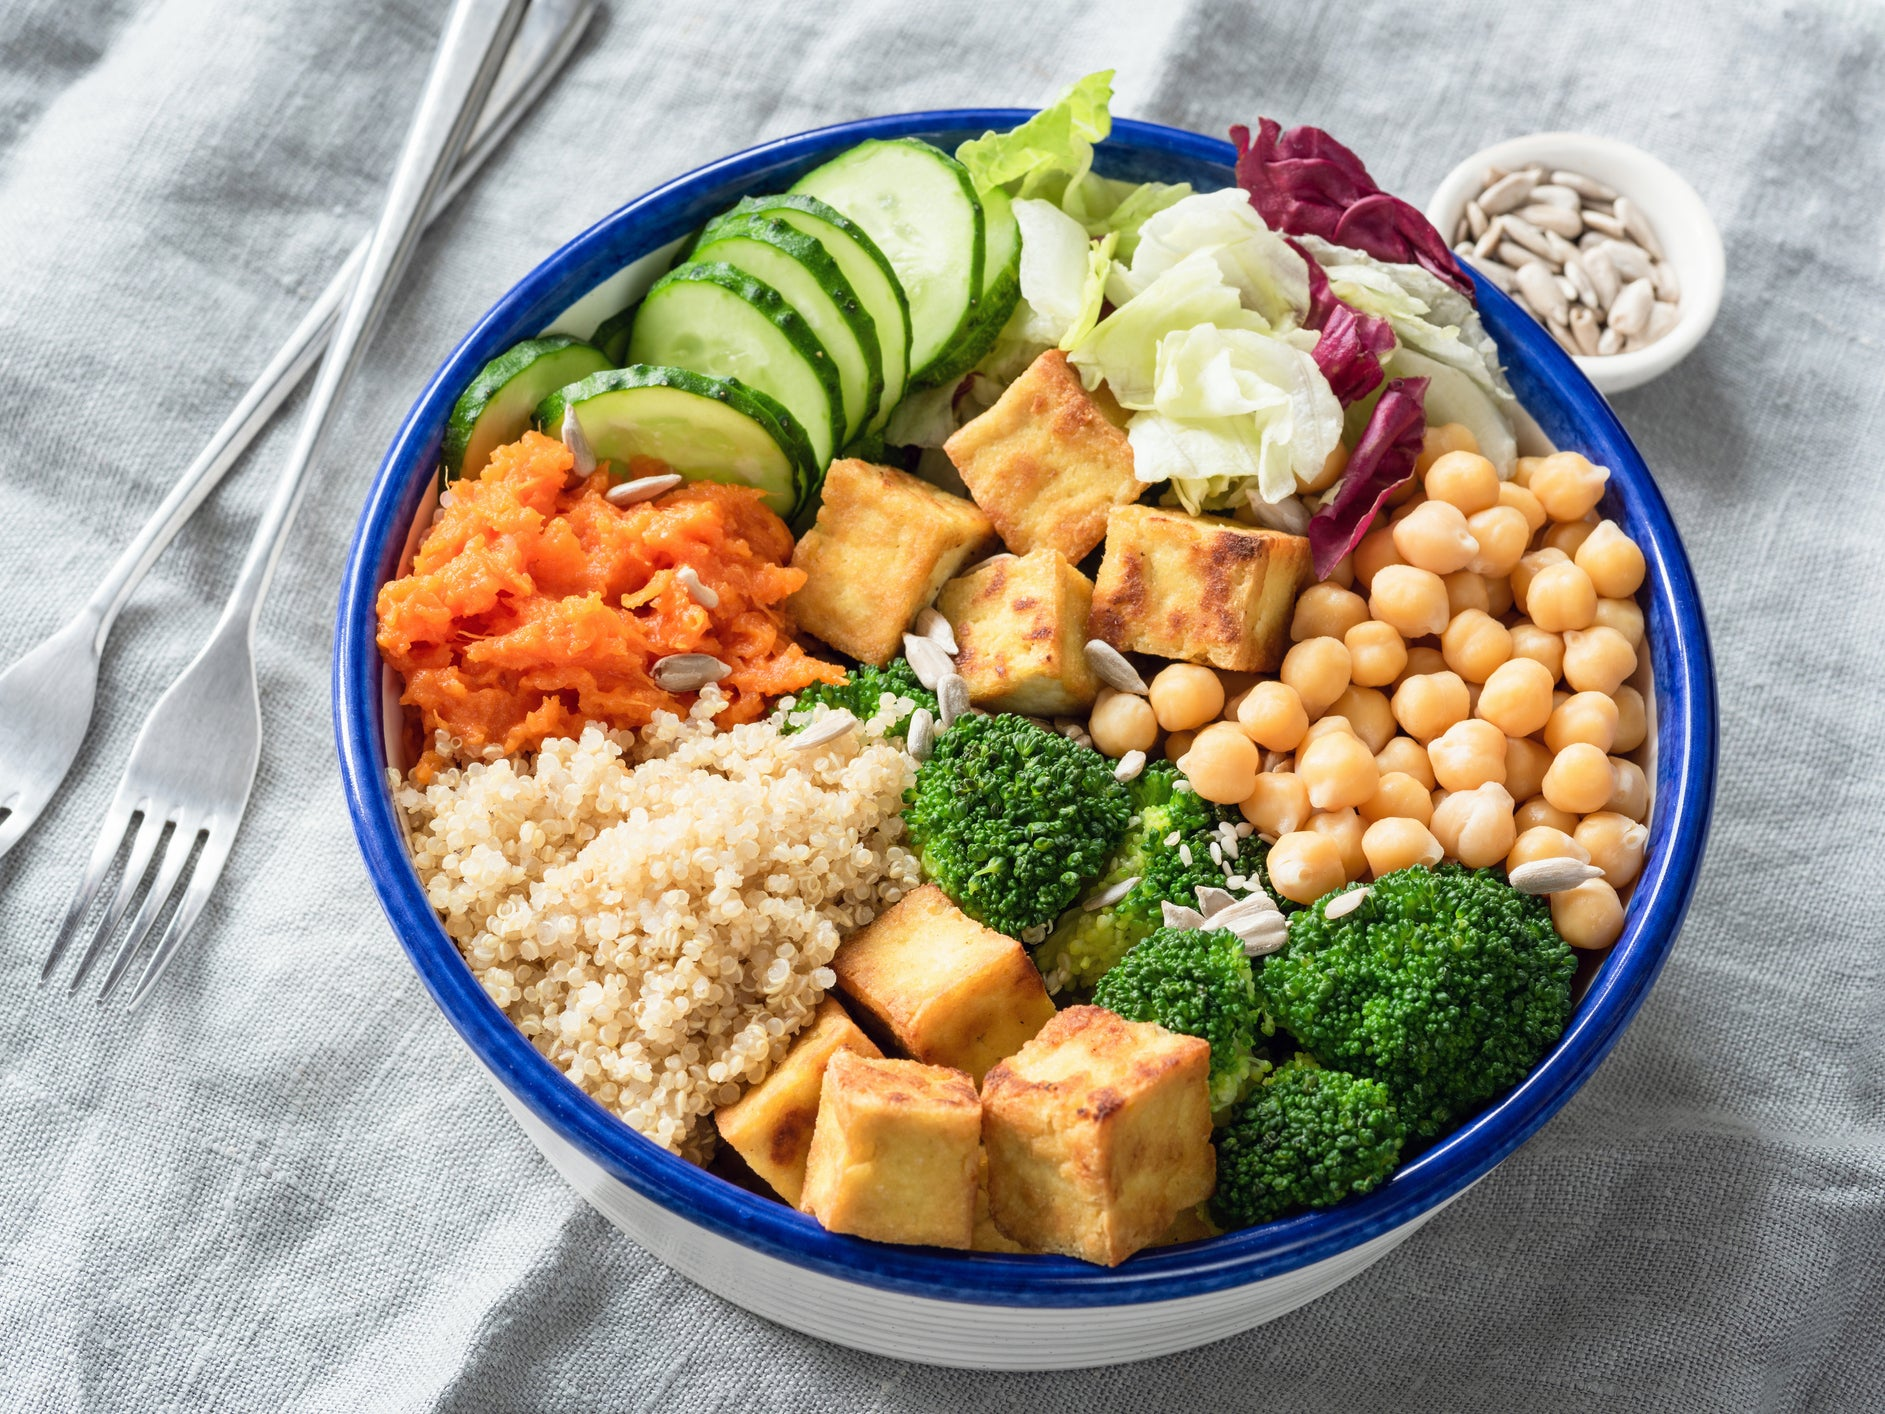

In [15]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [16]:
!curl -o image2.jpg https://thumbs.dreamstime.com/b/old-wooden-bridge-over-river-autumn-forest-night-spanning-illuminated-moonlight-fog-nighttime-atmosphere-add-357253971.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 74064  100 74064    0     0   300k      0 --:--:-- --:--:-- --:--:--  301k


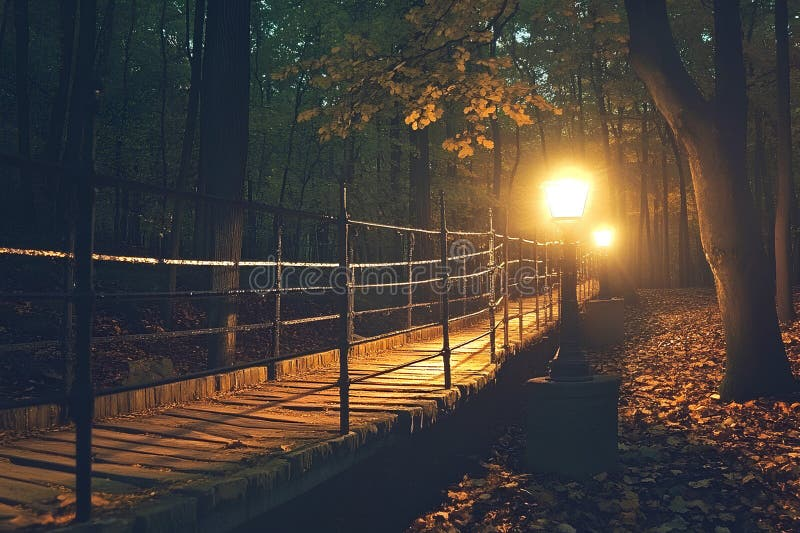

In [17]:
img2 = PIL.Image.open('image2.jpg')
img2

In [18]:
# loading the vision model

model2 = genai.GenerativeModel('gemini-1.5-flash')

In [19]:
response = model2.generate_content(img)
response.text


"Here's a description of the image:\n\nHigh-angle, close-up view of a vibrant and colorful buddha bowl.\xa0\n\n\nThe bowl is white with a dark blue rim and contains a variety of healthy ingredients:\n\n* **Quinoa:** A generous portion of fluffy cooked quinoa forms a base.\n* **Tofu:** Several cubes of pan-fried or baked tofu are arranged artfully on top of the quinoa.\n* **Chickpeas:** A significant amount of cooked chickpeas are clustered together, adding protein.\n* **Broccoli:** Florets of fresh broccoli are placed beside the chickpeas.\n* **Carrot puree:** A bright orange, seemingly pureed or mashed carrot mixture is nestled next to the quinoa.\n* **Cucumber:** Thinly sliced cucumbers are fanned out in a visually appealing way.\n* **Lettuce:** A mix of light green lettuce and some darker red leaves add freshness.\n* **Sunflower seeds:** A scattering of sunflower seeds are sprinkled throughout the bowl.\n\nThe bowl rests on a light gray linen tablecloth, with two silver forks lying 

In [20]:
response = model2.generate_content(img2)
response.text
display(to_markdown(response.text))

> Here is a description of the image:
> 
> Eye-level view of a wooden walkway or bridge at night in a forest. 
> 
> 
> Here's a breakdown of the scene:
> 
> * **The Walkway:** A rustic wooden walkway with railings stretches into the distance, illuminated by the warm glow of lights. The wood looks slightly aged and textured.
> 
> * **The Lighting:** A prominent lamppost stands near the viewer's perspective, emitting a bright, yellowish light that illuminates the path.  Another, dimmer light can be seen farther down the walkway, suggesting a line of lighting along the bridge.
> 
> * **The Forest:** Tall, dark trees densely surround the walkway, creating a shadowy, mysterious atmosphere. Some of the trees are bare or partially leafless, suggesting it might be autumn. Fallen leaves are visible on the ground alongside the bridge.
> 
> * **The Overall Mood:** The image has a melancholic, slightly eerie, yet beautiful mood, enhanced by the interplay of light and shadow. The warm light contrasts with the cool darkness of the surrounding woods, creating a sense of depth and intrigue.


In [21]:
# giving prompt and image at time to the model and asking to generate a blog port

response = model2.generate_content(["Hey please write me an 5 lines of blog post based on the image given to you",img],stream=True)

In [22]:
response.resolve()

In [23]:
response.text

"Here's a 5-line blog post based on the image:\n\nFuel your body with this vibrant vegan bowl!  Packed with protein-rich tofu and chickpeas, healthy fats, and a rainbow of veggies, it's a complete meal. Quinoa provides sustained energy, while the carrots and cucumbers add sweetness and crunch.  This recipe is easy to customize – add your favorite greens and seeds! Perfect for a quick and delicious lunch or dinner.\n"

In [24]:
display(to_markdown(response.text))

> Here's a 5-line blog post based on the image:
> 
> Fuel your body with this vibrant vegan bowl!  Packed with protein-rich tofu and chickpeas, healthy fats, and a rainbow of veggies, it's a complete meal. Quinoa provides sustained energy, while the carrots and cucumbers add sweetness and crunch.  This recipe is easy to customize – add your favorite greens and seeds! Perfect for a quick and delicious lunch or dinner.


### **Advance functionality of Gemini**

- Generation configuration:
  
    Generation configuration helps you to modify the generation parameters. Every prompt has parameter values that decide how the model will generate the response.

- Chat history

    Gemini enable you to have freeform conversation across multiple turns. The chat sessin classs simplifies the process by managing tge state of the conversation.

- Count tokens

    Count the number of tokens in the response.

- Embedding

    Converting the text or string into numbers.
- Safety measures

In [25]:
# Generation configuration

response = model.generate_content(
    "Tell me something about Lord Ram",
    generation_config = genai.GenerationConfig(
    candidate_count = 1,
    stop_sequences=["x"],
    max_output_tokens=50,
    temperature=1.0)

)

**Max_output_tokens:** Specify the maximum number of tokens that can be generated into the response. A token is approximately 4 char. 100 tokens means around 60-80 words.

**Temperature(0-2):** The temperatur is nothing but a randomness in the tokens selection. Low temp. are good for prompts that required more deterministic or less open-ended response, while higher temperature can lead to more diverse or creative result.

**topK & topP:**The topK parameter changes how the model select tokems for output.

**Stop_sequences:** Set the stop sequence of the model to tell to stop the generation.

In [26]:
response.candidates

[content {
  parts {
    text: "Lord Rama is a central figure in Hinduism, revered as the seventh avatar of Vishnu. Here\'s a brief overview of some key aspects of him:\n\n*   **Epic Hero:** He is the protagonist of the epic Ramayana, which narrates his"
  }
  role: "model"
}
finish_reason: MAX_TOKENS
avg_logprobs: -0.22890876321231618
]

In [27]:
response.parts

[text: "Lord Rama is a central figure in Hinduism, revered as the seventh avatar of Vishnu. Here\'s a brief overview of some key aspects of him:\n\n*   **Epic Hero:** He is the protagonist of the epic Ramayana, which narrates his"
]

In [29]:
display(to_markdown(response.text))

> Lord Rama is a central figure in Hinduism, revered as the seventh avatar of Vishnu. Here's a brief overview of some key aspects of him:
> 
> *   **Epic Hero:** He is the protagonist of the epic Ramayana, which narrates his

In [30]:
# Chat conversation

model

genai.GenerativeModel(
    model_name='models/gemini-2.0-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [31]:
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-2.0-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [32]:
response = chat.send_message("In one sentence tell me how the 2v engine works ?")
response.text

'A 2v engine uses two valves per cylinder, one for intake and one for exhaust, to control the flow of air and fuel in and out of the combustion chamber.\n'

In [33]:
# see the chat history
chat.history

[parts {
   text: "In one sentence tell me how the 2v engine works ?"
 }
 role: "user",
 parts {
   text: "A 2v engine uses two valves per cylinder, one for intake and one for exhaust, to control the flow of air and fuel in and out of the combustion chamber.\n"
 }
 role: "model"]

In [34]:
response = chat.send_message("Tell me what are Tranformers in electrical engineering terms ?",stream=True)

In [36]:
response.resolve()


In [37]:
response.text

'In electrical engineering, a transformer is a static device that transfers electrical energy from one circuit to another through electromagnetic induction, typically changing the voltage and current levels while maintaining the frequency.\n'

In [38]:
chat.history

[parts {
   text: "In one sentence tell me how the 2v engine works ?"
 }
 role: "user",
 parts {
   text: "A 2v engine uses two valves per cylinder, one for intake and one for exhaust, to control the flow of air and fuel in and out of the combustion chamber.\n"
 }
 role: "model",
 parts {
   text: "Tell me what are Tranformers in electrical engineering terms ?"
 }
 role: "user",
 parts {
   text: "In electrical engineering, a transformer is a static device that transfers electrical energy from one circuit to another through electromagnetic induction, typically changing the voltage and current levels while maintaining the frequency.\n"
 }
 role: "model"]

In [39]:
# coutn the tokens
model.count_tokens("Tell me something about Lord Ram")

total_tokens: 6

In [40]:
# embeddings

result = genai.embed_content(
    model = "models/embedding-001",
    content="What is the meaning of life?",
    task_type = "retrieval_document",
    title = "Meaning of life"
)

In [42]:
result['embedding']

[0.019933615,
 -0.03873033,
 -0.060478482,
 -0.012323432,
 0.031278424,
 0.0006154898,
 0.042503145,
 0.0378051,
 -0.013697889,
 0.014789164,
 -0.027345646,
 0.011691821,
 0.004598632,
 -0.01697361,
 -0.013642962,
 -0.017101703,
 0.019861517,
 0.024403933,
 0.011611381,
 0.010007727,
 -0.019374093,
 0.006521555,
 -0.010508247,
 0.028891483,
 0.02380809,
 -0.052371975,
 -0.0060688937,
 -0.031985745,
 -0.016153282,
 0.022456726,
 -0.02118522,
 0.031137273,
 -0.053246424,
 -0.0014722666,
 0.016141294,
 -0.06897835,
 0.009173537,
 -0.0034877162,
 -0.045556962,
 0.023819393,
 0.037173595,
 -0.033139005,
 -0.077235974,
 0.020715052,
 -0.007623765,
 0.015749896,
 -0.038228694,
 0.049402148,
 0.035058185,
 -0.090983994,
 0.02163151,
 0.02604629,
 0.1005165,
 0.019238697,
 -0.017731559,
 -0.00930212,
 0.034892887,
 -0.010823574,
 -0.00347967,
 0.008169669,
 0.012734284,
 0.0025471312,
 0.03735926,
 0.01872309,
 -0.012780118,
 -0.04028651,
 0.016564392,
 0.009941017,
 0.038901113,
 0.01199687,
 

In [44]:
len(result["embedding"])

768

In [46]:
result = genai.embed_content(
    model = "models/embedding-001",
    content=["What is the meaning of life?",
             "Tell me something about Lord Ram",
             "Nice to see you"],
    task_type = "retrieval_document",
    title = "Embeddig of list"
)

In [49]:
for i in result['embedding']:
  print(i)
  print(len(i))

[0.013052001, -0.016567247, -0.057004075, -0.010335986, 0.021974353, -0.0049303547, 0.05767805, 0.032801583, -0.0062769926, 0.042668127, -0.028720582, -0.005252934, 0.022706456, -0.014280525, 0.013930657, -0.028485168, 0.030073268, -0.012188267, -0.0050194873, -0.006807657, -0.021940023, 0.007247536, -0.011760538, 0.0010987638, 0.019477962, -0.04509764, 0.016659878, -0.055424504, -0.01641822, 0.007968269, -0.003791106, 0.048269816, -0.03450556, -0.005080467, 0.018369133, -0.073740065, -0.0035991203, -0.022568148, -0.040539704, 0.026305685, 0.04014286, -0.02714968, -0.06825217, 0.025967523, -0.016903875, -0.024588516, -0.011264916, 0.05382013, 0.029625203, -0.09337132, 0.018008146, 0.020742526, 0.08865097, -0.00083739427, -0.016933551, -0.012350699, 0.03012694, 0.008563866, -0.022604859, 0.019272352, 0.021425836, -0.032856517, 0.039309856, 0.045972954, -0.037612554, -0.05340818, 0.025996288, 0.005259762, 0.04406217, 0.014997866, -0.0126781855, -0.024365421, 0.034275007, 0.0129727395, 0.